# Running models and cross validation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics

C:\Users\luisf\AppData\Local\Temp\ipykernel_12244\4088898045.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Time series split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Loading final dataset
df = pd.read_csv('dummies_cleaned.csv')
print(df.head())
print(df.shape)

#Counting NA
nan_count = df['energy_price'].isna().sum()
print(nan_count)

#df_cleared = df.dropna(subset=['energy_price'])
#print(df_cleared.shape)

   Unnamed: 0  energy_price     biomass          gas      nuclear  year  \
0           0         44.94  252.200902  1180.283774  7185.089448  2015   
1           1         26.48  135.000000   172.000000  2596.000000  2015   
2           2         25.02   18.000000   233.000000  7185.089448  2015   
3           3         27.38   25.000000   304.000000  7185.089448  2015   
4           4         27.38  252.200902  1180.283774  7185.089448  2015   

   month  day  hour  week_number  ...  week_number_51  week_number_52  \
0      1    1     0            1  ...               0               0   
1      1    1     0            1  ...               0               0   
2      1    1     0            1  ...               0               0   
3      1    1     0            1  ...               0               0   
4      1    1     0            1  ...               0               0   

   week_number_53  day_of_week_0  day_of_week_1  day_of_week_2  day_of_week_3  \
0               0            

In [3]:
# Separating features and target variable
y = df['energy_price']
X = df.drop(['energy_price'], axis=1)

In [6]:
#Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data
split_point = int(len(y) * 0.8)
y_train, y_test = y[0:split_point], y[split_point:]
X_train, X_test = X[0:split_point], X[split_point:]
df_train, df_test = df_cleared[0:split_point], df_cleared[split_point:]
print(y_train)

1976013     44.94
1976014     26.48
1976017     25.02
1976018     27.38
1976019     27.38
            ...  
4838646      9.45
4838647    202.81
4838648     56.96
4838649    -30.00
4838650    138.05
Name: energy_price, Length: 2697072, dtype: float64


In [7]:
# Fit model
model = ARIMA(y_train, order=(1,0,0))  # example order, adjust based on your data
fitted_model = model.fit()


# Forecast
predictions = fitted_model.forecast(steps=len(y_test))



c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: F

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Forecasted', color='red')
plt.legend()
plt.show()

print(predictions)


ValueError: Input contains NaN.

In [10]:
print(fitted_model)

Basic linear model with latest dataset ("dummies_cleaned.csv")

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("dummies_cleaned.csv")

MemoryError: Unable to allocate 4.76 GiB for an array with shape (194, 3294780) and data type int64

In [3]:
y = df['energy_price']
X = df.drop(['energy_price'], axis=1)


In [5]:
print(y.describe)
print(X.info)

<bound method NDFrame.describe of 0          44.94
1          26.48
2          25.02
3          27.38
4          27.38
           ...  
3294775    44.87
3294776    44.87
3294777    44.87
3294778    33.30
3294779    35.14
Name: energy_price, Length: 3294780, dtype: float64>
<bound method DataFrame.info of          Unnamed: 0                 Date Country     biomass          gas  \
0                 0  2015-01-01 00:00:00      CH  252.200902  1180.283774   
1                 1  2015-01-01 00:00:00      CZ  135.000000   172.000000   
2                 2  2015-01-01 00:00:00    DK_1   18.000000   233.000000   
3                 3  2015-01-01 00:00:00    DK_2   25.000000   304.000000   
4                 4  2015-01-01 00:00:00      EE  252.200902  1180.283774   
...             ...                  ...     ...         ...          ...   
3294775     3294775  2023-12-31 00:00:00    SE_2  252.200902  1180.283774   
3294776     3294776  2023-12-31 00:00:00    SE_3  252.200902  1180.283774   
3

In [4]:
#splitting set into training and data for this naive linear model
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

print(X.shape)
print(y.shape)

(3294780, 199)
(3294780,)


In [5]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [7]:
X_train = X_train.drop('Date', axis=1)

In [9]:
X_train.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
X_train.drop('Country', axis=1, inplace=True)

In [8]:
print(X_train.dtypes)

Unnamed: 0         int64
Country           object
biomass          float64
gas              float64
nuclear          float64
                  ...   
day_of_week_2      int64
day_of_week_3      int64
day_of_week_4      int64
day_of_week_5      int64
day_of_week_6      int64
Length: 198, dtype: object


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
X_test = pd.read_csv('X_test.csv')

In [28]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [30]:
X_test.drop('Date', axis=1, inplace=True)

In [31]:
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>


In [33]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [35]:
y_test = pd.read_csv('y_test.csv')

In [36]:
y_pred = model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9577.273403544055


NameError: name 'y' is not defined

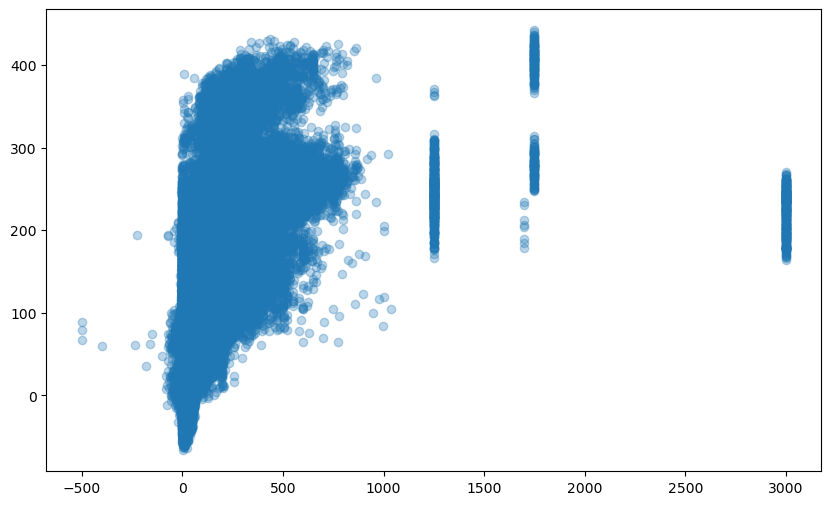

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [2]:
#now for timeseriessplit
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

C:\Users\luisf\AppData\Local\Temp\ipykernel_14784\3964244779.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("dummies_cleaned.csv")
#running the model on the entire dataset

In [4]:
X = df.drop(['energy_price', 'Date', 'Country'], axis=1)  # Assume these columns are not needed
y = df['energy_price']

In [5]:
tscv = TimeSeriesSplit(n_splits=20)
model = LinearRegression()

# Use MSE as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Execute cross-validation
scores = cross_val_score(model, X, y, cv=tscv, scoring=mse_scorer)
positive_mse_scores = -scores  # Convert scores to positive values
print("MSE scores per fold:", positive_mse_scores)
print("Average MSE across folds:", np.mean(positive_mse_scores))

MSE scores per fold: [3.30805931e+04 5.84036582e+06 6.16854290e+05 8.09848132e+10
 3.09936353e+03 2.73062302e+04 2.56386222e+12 1.96220892e+03
 5.88551366e+07 2.03628440e+03 5.69896644e+03 3.33937168e+03
 5.30122579e+03 1.68832150e+03 2.68721808e+03 2.48548249e+04
 1.94901561e+04 2.90318914e+04            nan            nan]
Average MSE across folds: nan


c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_base

In [10]:
print("MSE scores per fold:")
for score in positive_mse_scores:
    print(f"{score:.4f}")  # Format the score to 4 decimal places

# Calculate and print average MSE across folds
average_mse = np.nanmean(positive_mse_scores)
print(f"Average MSE across folds: {average_mse:.4f}")
#Analysis: MSE scores seems very unstable. This could be a sign of an overfitting model, outliers, .  

MSE scores per fold:
33080.5931
5840365.8206
616854.2900
80984813192.2168
3099.3635
27306.2302
2563862218487.6616
1962.2089
58855136.6477
2036.2844
5698.9664
3339.3717
5301.2258
1688.3215
2687.2181
24854.8249
19490.1561
29031.8914
nan
nan
Average MSE across folds: 146939583534.0719


In [9]:
print("Number of samples:", len(X))
print("Minimum number of samples required per fold:", len(X) // tscv.n_splits)
print(X.isnull().sum())
print(y.isnull().sum())

Number of samples: 3294780
Minimum number of samples required per fold: 164739
Unnamed: 0       0
biomass          0
gas              0
nuclear          0
year             0
                ..
day_of_week_2    0
day_of_week_3    0
day_of_week_4    0
day_of_week_5    0
day_of_week_6    0
Length: 197, dtype: int64
0


In [11]:
#now we can try with more folds and correct the model. First scaling. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 

In [13]:
#columns = X.columns  # capture original column names
#X_scaled_df = pd.DataFrame(X_scaled, columns=columns)
#X_scaled_df.to_csv('X_scaled.csv', index=False)

KeyboardInterrupt: 

In [5]:
X_test.drop('Date', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis=1, inplace=True)
X_train.drop('Date', axis=1, inplace=True)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

C:\Users\luisf\AppData\Local\Temp\ipykernel_15732\3624062442.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test= pd.read_csv('y_test.csv')
y_train= pd.read_csv('y_train.csv')

KeyboardInterrupt: 

In [3]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')

In [13]:
columns = X_train.columns

In [14]:
print("Column Names in X_train:")
for column in columns:
    print(column)

Column Names in X_train:
biomass
gas
nuclear
year
month
day
hour
week_number
day_of_week
weekend
Country_BE
Country_BG
Country_CH
Country_CZ
Country_Combined_AT_DE_AT_LU
Country_DK_1
Country_DK_2
Country_EE
Country_ES
Country_FI
Country_FR
Country_GB
Country_GR
Country_HR
Country_HU
Country_IT_BRNN
Country_IT_CNOR
Country_IT_CSUD
Country_IT_FOGN
Country_IT_GR
Country_IT_NORD
Country_IT_NORD_AT
Country_IT_NORD_CH
Country_IT_NORD_FR
Country_IT_NORD_SI
Country_IT_PRGP
Country_IT_SACO_AC
Country_IT_SACO_DC
Country_IT_SARD
Country_IT_SICI
Country_IT_SUD
Country_LV
Country_ME
Country_MK
Country_NL
Country_NO_1
Country_NO_2
Country_NO_3
Country_NO_4
Country_NO_5
Country_PL
Country_PT
Country_RO
Country_RS
Country_SE_1
Country_SE_2
Country_SE_3
Country_SE_4
Country_SI
Country_SK
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020
year_2021
year_2022
year_2023
month_1
month_2
month_3
month_4
month_5
month_6
month_7
month_8
month_9
month_10
month_11
month_12
day_1
day_2
day_3
day_4
day_5

In [10]:
X_test = X_test.drop(['Date', 'Country'], axis=1)
X_train = X_train.drop(['Date', 'Country'], axis=1)

In [11]:
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_train = X_train.drop(['Unnamed: 0'], axis=1)

In [15]:
scaler = StandardScaler()

In [17]:
continuous_vars = ['biomass', 'gas', 'nuclear']
dummy_vars = X_train.drop(columns=continuous_vars)

In [18]:
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_vars])

# Convert the scaled array back to a DataFrame
X_train_scaled_continuous = pd.DataFrame(X_train_scaled_continuous, columns=continuous_vars, index=X_train.index)

In [19]:
X_train_final = pd.concat([X_train_scaled_continuous, dummy_vars], axis=1)
X_train_final.to_csv('X_train_scaled.csv', index=False)

In [20]:
X_test_scaled_continuous = scaler.transform(X_test[continuous_vars])

# Convert the scaled array back to a DataFrame
X_test_scaled_continuous = pd.DataFrame(X_test_scaled_continuous, columns=continuous_vars, index=X_test.index)

# Concatenate scaled continuous variables back with dummy variables
X_test_final = pd.concat([X_test_scaled_continuous, X_test[dummy_vars.columns]], axis=1)  # Ensure dummy columns align

# Save the test DataFrame (Optional)
X_test_final.to_csv('X_test_scaled.csv', index=False)

In [2]:
X_train_scaled = pd.read_csv("X_train_scaled.csv")
X_test_scaled = pd.read_csv("X_test_scaled.csv")

In [4]:
X_train_scaled

,biomass,gas,nuclear,year,month,day,hour,week_number,day_of_week,weekend,...,week_number_51,week_number_52,week_number_53,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,-0.421234,-0.724768,0.000037,2023,8,29,11,35,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.000206,0.000200,0.000037,2020,7,22,17,30,2,0,...,0,0,0,0,0,1,0,0,0,0
2,0.187233,3.166908,8.019487,2019,1,6,3,1,6,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.000206,0.000200,0.000037,2015,11,19,7,47,3,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.000206,-0.727853,-0.242634,2023,1,10,22,2,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635819,0.074932,1.125767,6.293691,2019,5,15,14,20,2,0,...,0,0,0,0,0,1,0,0,0,0
2635820,-0.000206,0.000200,0.000037,2021,4,10,22,14,5,1,...,0,0,0,0,0,0,0,0,1,0
2635821,-0.000206,0.754426,0.000037,2020,11,26,9,48,3,0,...,0,0,0,0,0,0,1,0,0,0
2635822,-0.449820,-0.595231,-0.885468,2022,6,26,18,25,6,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
y_test = pd.read_csv("y_test.csv")
y_train=pd.read_csv("y_train.csv")

In [7]:
alphas = np.logspace(-6, 6, 13)

# Set up the RidgeCV model; store_cv_values=True allows storing of cross-validation values if needed for inspection
tscv = TimeSeriesSplit(n_splits=4)

# Initialize RidgeCV with the defined alphas and TimeSeriesSplit
ridge_cv = RidgeCV(alphas=alphas, cv=tscv, scoring='neg_mean_squared_error')

# Fit RidgeCV on the entire training data
ridge_cv.fit(X_train_scaled, y_train)

NameError: name 'store_cv_values' is not defined

In [ ]:
y_pred_cv = ridge_cv.predict(X_test_final)

# Calculate the Mean Squared Error on the test set
mse_ridge_cv = mean_squared_error(y_test, y_pred_cv)
print(f"Mean Squared Error for RidgeCV: {mse_ridge_cv}")
print(f"Optimal alpha chosen by RidgeCV: {ridge_cv.alpha_}")

In [ ]:
print("Optimal Alpha:", ridge_cv.alpha_)
print("Mean Squared Error on Test Set:", mse_ridge_cv)

In [1]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
tscv = TimeSeriesSplit(n_splits=20)

In [12]:
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=tscv, scoring='neg_mean_squared_error')

# Convert scores to positive MSE values
cross_val_mse_scores = -cross_val_scores
print("Cross-validation MSE scores:", cross_val_mse_scores)
print("Average Cross-validation MSE:", np.mean(cross_val_mse_scores))

In [4]:
alphas = np.logspace(-6, 6, 13)
model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', store_cv_values=True)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=20)

In [9]:
#Now cross-validation 
mse_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE for this fold and append to list
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Display results
print("MSE scores per fold:", mse_scores)
print("Average MSE across folds:", np.mean(mse_scores))

MemoryError: Unable to allocate 2.55 GiB for an array with shape (1725840, 198) and data type float64

In [6]:
#now try with energy_price_target'
X["energy_price_target"]


KeyError: 'energy_price_target'